In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

* Reading the csv file

In [2]:
la_crimes = pd.read_csv('LA Crime_Data_from_2010_to_2019.csv')
la_crimes.rename(columns={'AREA ': 'AREA'}, inplace = True)
la_crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114694,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2114695,190715222,08/15/2019 12:00:00 AM,08/14/2019 12:00:00 AM,1810,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),...,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732
2114696,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2114697,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


## DR_NO column
* We see that the column `DR_NO` is a unique code for each row, that means each crime reported has a different code

In [3]:
la_crimes['DR_NO'].value_counts()

151001085    1
161811979    1
111721424    1
121320908    1
121316814    1
            ..
130712581    1
130718726    1
151714826    1
151712779    1
151001091    1
Name: DR_NO, Length: 2114699, dtype: int64

## Date Rptd and DATE OCC columns
* We see that all the dates have the time of 12:00:00 AM

In [4]:
la_crimes['Date Rptd'].str[-8:].value_counts() #selecting only the time and getting the different values of it

00:00 AM    2114699
Name: Date Rptd, dtype: int64

In [5]:
la_crimes['DATE OCC'].str[-8:].value_counts() #selecting only the time and getting the different values of it

00:00 AM    2114699
Name: DATE OCC, dtype: int64

* As result, we can delete the data of the time because it does not give additional information to us

In [6]:
la_crimes['Date Rptd'] = la_crimes['Date Rptd'].str[:10] #only keeping the data of the date without the time

In [7]:
la_crimes['DATE OCC'] = la_crimes['DATE OCC'].str[:10] #only keeping the data

* Now we are going to bring the date format to the appropriate one for databases: YYYY-MM-DD

In [8]:
la_crimes['Date Rptd'] = pd.to_datetime(la_crimes['Date Rptd'])
la_crimes['DATE OCC'] = pd.to_datetime(la_crimes['DATE OCC'])
la_crimes['Date Rptd'].sample(5)

979910    2014-09-25
1772166   2018-01-26
1707573   2019-01-01
1064192   2015-05-15
1785673   2018-06-04
Name: Date Rptd, dtype: datetime64[ns]

## TIME OCC column
* Now we have to fix the column  `TIME OCC` to a '24hour:minutes' format
* First we transform the column to datatype string because it was integer
* Then we add  '00' in front of every date (because the rows with time occured at 12AM have no values for hours
* Lastly we only select the right string characters

In [9]:
la_crimes['TIME OCC'] = la_crimes['TIME OCC'].astype(str)

In [10]:
la_crimes['TIME OCC']= '00'+la_crimes['TIME OCC']

In [11]:
la_crimes['TIME OCC'] = la_crimes['TIME OCC'].str[-4:-2] + ':' +la_crimes['TIME OCC'].str[-2:]

* We join the  columns `DATE OCC` and `TIME OCC` into the column `DATE OCC` so that it will be in the format YYYY-MM-DD hh:mm. It will be saved as datatype datetime YYYY-MM-DD hh:mm:ss in the database
* We drop the column `TIME OCC`

In [12]:
la_crimes['DATE OCC'] = la_crimes['DATE OCC'].astype(str) +' ' + la_crimes['TIME OCC']
la_crimes['DATE OCC'] = pd.to_datetime(la_crimes['DATE OCC'])

In [13]:
la_crimes = la_crimes.drop(['TIME OCC'], axis=1)

## Mocodes column
We see that some crime reports have null values for the column of `Mocodes`
* We replace those values with the value `unknown`

In [14]:
la_crimes.loc[la_crimes['Mocodes'].isna()]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
15,100100535,2010-01-17,2010-01-16 17:35:00,1,Central,185,2,946,OTHER MISCELLANEOUS CRIME,NaN,...,IC,Invest Cont,946.0,999.0,NaN,NaN,300 E OLYMPIC BL,NaN,34.0389,-118.2550
28,100100578,2010-02-05,2010-02-03 12:55:00,1,Central,185,2,946,OTHER MISCELLANEOUS CRIME,NaN,...,IC,Invest Cont,946.0,999.0,NaN,NaN,1200 MAPLE AV,NaN,34.0357,-118.2563
51,100100654,2010-02-27,2010-02-27 19:55:00,1,Central,174,2,946,OTHER MISCELLANEOUS CRIME,NaN,...,AA,Adult Arrest,946.0,NaN,NaN,NaN,W 7TH ST,S SPRING ST,34.0445,-118.2523
79,100100730,2010-03-23,2010-03-20 12:15:00,1,Central,111,2,647,THROWING OBJECT AT MOVING VEHICLE,NaN,...,IC,Invest Cont,647.0,NaN,NaN,NaN,CESAR E CHAVEZ,FIGUEROA ST,34.0627,-118.2463
102,100100786,2010-04-08,2010-04-08 02:20:00,1,Central,161,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,520.0,NaN,NaN,FRANCISCO ST,8TH ST,34.0481,-118.2633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114663,190417846,2019-12-11,2019-12-06 18:00:00,4,Hollenbeck,423,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,1100 N MISSION RD,NaN,34.0651,-118.2116
2114670,191710450,2019-05-25,2019-05-25 06:30:00,17,Devonshire,1761,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,9200 ETON AV,NaN,34.2376,-118.5947
2114683,191816545,2019-07-22,2019-07-17 20:30:00,18,Southeast,1836,2,922,CHILD STEALING,NaN,...,AO,Adult Other,922.0,NaN,NaN,NaN,10400 FIRTH AV,NaN,33.9424,-118.2477
2114691,191307168,2019-02-28,2019-02-28 07:00:00,13,Newton,1394,1,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,100 E 67TH ST,NaN,33.9788,-118.2739


In [15]:
indexes_null_mo = la_crimes.loc[la_crimes ['Mocodes'].isna()].index
la_crimes.loc[indexes_null_mo,'Mocodes'] = 'unknown'

## Vict Age column
* Now we are going to fix the column `Vict Age` that don't make any sense
* Specifically we are going to change all negative age numbers to `0` which we consider missing value.

In [16]:
la_crimes['Vict Age'].value_counts()

 0      369886
 25      48101
 26      47469
 27      47011
 24      46739
         ...  
-7          15
-8           7
-9           4
 114         1
 118         1
Name: Vict Age, Length: 110, dtype: int64

In [17]:
indexes_neg_age = la_crimes.loc[la_crimes['Vict Age'] < 0]['Vict Age'].index #finding the indexes of negative ages
la_crimes.loc[indexes_neg_age,'Vict Age'] = 0

## Vict Sex column
* Now we fix the column `Vict Sex` which is the victim's sex.
* According to the description the values are: F - Female, M - Male, X - Unknown

In [18]:
la_crimes['Vict Sex'].value_counts()

M    974309
F    888499
X     55129
H        73
N        17
-         1
Name: Vict Sex, dtype: int64

* We see there are a bunch of irrelevant values which we change to 'X'

In [19]:
indexes_wrong_sex = la_crimes.loc[(la_crimes['Vict Sex'] != 'M') & (la_crimes['Vict Sex'] != 'F')].index
la_crimes.loc[indexes_wrong_sex,'Vict Sex'] = 'X'

## Vict Descent column
Now we will fix the column `Vict Descent`. We see there are a bunch of nan values. Also, according to the description of the dataset the different descents are: : 
* A - Other Asian 
* B - Black 
* C - Chinese  
* D - Cambodian 
* F - Filipino 
* G - Guamanian 
* H - Hispanic/Latin/Mexican 
* I - American Indian/Alaskan Native 
* J - Japanese 
* K - Korean 
* L - Laotian 
* O - Other 
* P - Pacific Islander 
* S - Samoan 
* U - Hawaiian 
* V - Vietnamese 
* W - White 
* X - Unknown 
* Z - Asian Indian

In [20]:
print("The reported crimes with Nan (null) values for the column Vict Descent are:")
len(la_crimes.loc[la_crimes['Vict Descent'].isna()])

The reported crimes with Nan (null) values for the column Vict Descent are:


196718

In [21]:
la_crimes['Vict Descent'].value_counts()

H    725348
W    510158
B    335102
O    202969
X     78147
A     51109
K      9141
F      2553
C      1061
I       945
J       418
P       343
V       201
U       190
Z       136
G        85
S        31
D        23
L        18
-         3
Name: Vict Descent, dtype: int64

In [22]:
indexes_wrong_decent = la_crimes.loc[(la_crimes['Vict Descent'] == '-') | (la_crimes['Vict Descent'].isna())].index
la_crimes.loc[indexes_wrong_decent,'Vict Descent'] = 'X'

## Premis Cd and Premis Desc columns
Now we see that many rows have null values for the column `Premis Cd` 
* Because this column has float values, we replace the null values with `0`

In [23]:
la_crimes.loc[la_crimes['Premis Cd'].isna()]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
6590,100121447,2010-12-12,2010-12-12 11:50:00,1,Central,185,1,110,CRIMINAL HOMICIDE,unknown,...,AA,Adult Arrest,110.0,NaN,NaN,NaN,200 W OLYMPIC BL,NaN,34.0409,-118.2574
32148,100913648,2010-06-21,2010-06-20 14:35:00,9,Van Nuys,915,1,510,VEHICLE - STOLEN,unknown,...,IC,Invest Cont,510.0,NaN,NaN,NaN,7000 VAN NUYS BL,NaN,34.1976,-118.4487
67340,100816222,2010-09-03,2010-04-16 00:01:00,8,West LA,803,2,813,CHILD ANNOYING (17YRS & UNDER),unknown,...,IC,Invest Cont,813.0,NaN,NaN,NaN,2000 MANDAVILLE C,NaN,34.0949,-118.5111
68276,100818222,2010-11-18,2010-10-16 16:00:00,8,West LA,811,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,unknown,...,IC,Invest Cont,812.0,NaN,NaN,NaN,1100 LAS PULGAS RD,NaN,34.0528,-118.5393
71523,100908076,2010-03-16,2010-03-15 22:05:00,15,N Hollywood,1547,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,IC,Invest Cont,420.0,NaN,NaN,NaN,BECK,CHANDLER,34.1687,-118.3834
85649,101017796,2010-09-21,2010-09-08 17:20:00,10,West Valley,1067,2,813,CHILD ANNOYING (17YRS & UNDER),unknown,...,AO,Adult Other,813.0,NaN,NaN,NaN,5400 LOUISE AV,NaN,34.1694,-118.5098
92668,101114489,2010-06-18,2010-06-18 19:10:00,11,Northeast,1178,1,820,ORAL COPULATION,unknown,...,IC,Invest Cont,820.0,NaN,NaN,NaN,CYPRESS AV,FIGUEROA,34.0864,-118.2190
102768,101214269,2010-05-13,2010-05-12 18:00:00,12,77th Street,1242,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,unknown,...,IC,Invest Cont,235.0,NaN,NaN,NaN,6200 3RD AV,NaN,33.9837,-118.3206
107695,101223939,2010-09-17,2010-06-01 12:00:00,12,77th Street,1213,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,unknown,...,IC,Invest Cont,812.0,NaN,NaN,NaN,1700 W 52ND ST,NaN,33.9951,-118.3068
124293,101410405,2010-04-12,2010-04-11 23:20:00,14,Pacific,1494,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,AA,Adult Arrest,420.0,NaN,NaN,NaN,300 WORLD WY,NaN,33.9440,-118.4073


In [24]:
la_crimes.loc[la_crimes['Premis Desc'] =='unknown'][['Premis Cd','Premis Desc']]

,Premis Cd,Premis Desc


In [25]:
indexes_null_premiscd = la_crimes.loc[la_crimes ['Premis Cd'].isna()].index
la_crimes.loc[indexes_null_premiscd,'Premis Cd'] = 0

Now we see that many rows have null values for the column `Premis Desc`

* We replace those null values with `unknown`

In [26]:
la_crimes.loc[la_crimes['Premis Desc'].isna()]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
6590,100121447,2010-12-12,2010-12-12 11:50:00,1,Central,185,1,110,CRIMINAL HOMICIDE,unknown,...,AA,Adult Arrest,110.0,NaN,NaN,NaN,200 W OLYMPIC BL,NaN,34.0409,-118.2574
32148,100913648,2010-06-21,2010-06-20 14:35:00,9,Van Nuys,915,1,510,VEHICLE - STOLEN,unknown,...,IC,Invest Cont,510.0,NaN,NaN,NaN,7000 VAN NUYS BL,NaN,34.1976,-118.4487
67340,100816222,2010-09-03,2010-04-16 00:01:00,8,West LA,803,2,813,CHILD ANNOYING (17YRS & UNDER),unknown,...,IC,Invest Cont,813.0,NaN,NaN,NaN,2000 MANDAVILLE C,NaN,34.0949,-118.5111
68276,100818222,2010-11-18,2010-10-16 16:00:00,8,West LA,811,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,unknown,...,IC,Invest Cont,812.0,NaN,NaN,NaN,1100 LAS PULGAS RD,NaN,34.0528,-118.5393
71523,100908076,2010-03-16,2010-03-15 22:05:00,15,N Hollywood,1547,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,IC,Invest Cont,420.0,NaN,NaN,NaN,BECK,CHANDLER,34.1687,-118.3834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109009,190223459,2019-12-17,2019-12-15 21:45:00,2,Rampart,236,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344 1309 1822 0913 1803,...,IC,Invest Cont,668.0,NaN,NaN,NaN,100 S ALVARADO ST,NaN,34.0667,-118.2703
2109581,191515929,2019-08-20,2019-08-20 05:40:00,15,N Hollywood,1599,1,310,BURGLARY,2018 0344 1309 1609 1402 1414 0384,...,IC,Invest Cont,310.0,998.0,NaN,NaN,3700 CAHUENGA BL,NaN,34.1350,-118.3612
2113695,190119416,2019-07-28,2019-07-27 18:00:00,1,Central,157,1,320,"BURGLARY, ATTEMPTED",1607,...,IC,Invest Cont,320.0,NaN,NaN,NaN,600 CROCKER ST,NaN,34.0417,-118.2443
2114205,191221441,2019-08-29,2019-08-29 01:00:00,12,77th Street,1268,1,110,CRIMINAL HOMICIDE,1100 0430 1402 1822 0906,...,AA,Adult Arrest,110.0,998.0,NaN,NaN,8100 S BROADWAY,NaN,33.9660,-118.2783


In [27]:
indexes_null_premisdesc = la_crimes.loc[la_crimes ['Premis Desc'].isna()].index
la_crimes.loc[indexes_null_premisdesc,'Premis Desc'] = 'unknown'

Theoretically, for the rows with `Premis Desc` = 'unknown', the column `Premis Cd` should be equal to $0$ (unknown). However, there are some rows with `Premis Cd` different than 0

In [28]:
la_crimes.loc[la_crimes['Premis Desc']=='unknown'][['Premis Desc','Premis Cd']]

,Premis Desc,Premis Cd
6590,unknown,0.0
32148,unknown,0.0
67340,unknown,0.0
68276,unknown,0.0
71523,unknown,0.0
...,...,...
2109009,unknown,418.0
2109581,unknown,256.0
2113695,unknown,256.0
2114205,unknown,256.0


In detail, the rows with `Premis Desc` = 'unknown', have the values of $0$ or $256$ or $418$ or $838$

In [29]:
la_crimes.loc[la_crimes['Premis Desc']=='unknown']['Premis Cd'].unique()

array([  0., 838., 418., 256.])

* Next up we see that all the rows with `Premis Cd` = $418$, have `Premis Desc` = 'unknown`
* Thus we can change `Premis Cd` to $0$ (unknown)

In [30]:
cd418 = la_crimes.loc[la_crimes['Premis Cd']==418][['Premis Desc','Premis Cd']]
cd418['Premis Desc'].unique()

array(['unknown'], dtype=object)

* Next up we see that all the rows with `Premis Cd` = $256$, have `Premis Desc` = 'unknown`
* Thus we can change `Premis Cd` to $0$ (unknown)

In [31]:
cd256 = la_crimes.loc[la_crimes['Premis Cd']== 256][['Premis Desc','Premis Cd']]
cd256['Premis Desc'].unique()

array(['unknown'], dtype=object)

* Next up we see that all the rows with `Premis Cd` = $838$, have `Premis Desc` = 'unknown`
* Thus we can change `Premis Cd` to $0$ (unknown)

In [32]:
cd838 = la_crimes.loc[la_crimes['Premis Cd']== 838][['Premis Desc','Premis Cd']]
cd838['Premis Desc'].unique()

array(['unknown'], dtype=object)

* We change all the rows with `Premis Cd` equal to $256$, $418$ or $838$, to $0$ (unknown)

In [33]:
indexes_wrong_premiscd = la_crimes.loc[(la_crimes ['Premis Cd'] == 256) | 
                                      (la_crimes ['Premis Cd'] == 418) |
                                      (la_crimes ['Premis Cd'] == 838)].index
la_crimes.loc[indexes_wrong_premiscd,'Premis Cd'] = 0

* Lastly, we transform `Premis Cd` from float to integer

In [34]:
la_crimes['Premis Cd'] = la_crimes['Premis Cd'].astype(int)

## Weapon Used Cd and Weapon Desc columns
Some rows have null values for the column `Weapon Used Cd`

* We replace those null values with `0` because this column contains float datatypes

In [35]:
la_crimes.loc[la_crimes['Weapon Used Cd'].isna()]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,2010-02-20,2010-02-20 13:50:00,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12 00:45:00,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,2010-08-09,2010-08-09 15:15:00,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
5,100100506,2010-01-05,2010-01-04 16:50:00,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 1402,...,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
6,100100508,2010-01-08,2010-01-07 20:05:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114687,191408297,2019-03-11,2019-03-08 12:00:00,14,Pacific,1438,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 1501 1608 1607 0349,...,IC,Invest Cont,440.0,NaN,NaN,NaN,3600 MIDVALE AV,NaN,34.0204,-118.4139
2114691,191307168,2019-02-28,2019-02-28 07:00:00,13,Newton,1394,1,510,VEHICLE - STOLEN,unknown,...,IC,Invest Cont,510.0,NaN,NaN,NaN,100 E 67TH ST,NaN,33.9788,-118.2739
2114695,190715222,2019-08-15,2019-08-14 18:10:00,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,...,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732
2114697,191716777,2019-10-17,2019-10-16 18:00:00,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


In [36]:
indexes_null_weaponcd = la_crimes.loc[la_crimes ['Weapon Used Cd'].isna()].index
la_crimes.loc[indexes_null_weaponcd,'Weapon Used Cd'] = 0

Also rows have null values for the column `Weapon Desc`

* We replace those null values with `unknown` because this column contains object datatypes

In [37]:
la_crimes.loc[la_crimes['Weapon Desc'].isna()]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,2010-02-20,2010-02-20 13:50:00,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12 00:45:00,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,2010-08-09,2010-08-09 15:15:00,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
5,100100506,2010-01-05,2010-01-04 16:50:00,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 1402,...,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
6,100100508,2010-01-08,2010-01-07 20:05:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114687,191408297,2019-03-11,2019-03-08 12:00:00,14,Pacific,1438,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 1501 1608 1607 0349,...,IC,Invest Cont,440.0,NaN,NaN,NaN,3600 MIDVALE AV,NaN,34.0204,-118.4139
2114691,191307168,2019-02-28,2019-02-28 07:00:00,13,Newton,1394,1,510,VEHICLE - STOLEN,unknown,...,IC,Invest Cont,510.0,NaN,NaN,NaN,100 E 67TH ST,NaN,33.9788,-118.2739
2114695,190715222,2019-08-15,2019-08-14 18:10:00,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,...,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732
2114697,191716777,2019-10-17,2019-10-16 18:00:00,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


In [38]:
indexes_null_weapondesc = la_crimes.loc[la_crimes ['Weapon Desc'].isna()].index
la_crimes.loc[indexes_null_weapondesc,'Weapon Desc'] = 'unknown'

Lastly, we transform the column `Weapon Used Cd` from float to integer

In [39]:
 la_crimes['Weapon Used Cd'] = la_crimes['Weapon Used Cd'].astype(int)

## Status and Status Desc columns
* Now we check the status of the crime incident
* We see that the columns `Status` and `Status Desc` have some differences.

In [40]:
la_crimes['Status'].value_counts()

IC    1623829
AO     250589
AA     219081
JA      15864
JO       5301
CC         29
19          1
13          1
TH          1
Name: Status, dtype: int64

In [41]:
la_crimes['Status Desc'].value_counts()

Invest Cont     1623829
Adult Other      250589
Adult Arrest     219081
Juv Arrest        15864
Juv Other          5301
UNK                  35
Name: Status Desc, dtype: int64

* We observe that all the values with a Status `CC` , `19` , `TH` , `13` have a Status Description `UNK`
* That's why we change the rows with a Status `19` , `TH` , `13`(because those only appear once) or null to `CC` 

In [42]:
la_crimes.loc[la_crimes['Status Desc'] == 'UNK']

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
100040,101208618,2010-03-02,2010-03-02 03:30:00,12,77th Street,1248,1,210,ROBBERY,0305 0342 0344 0416 1008,...,NaN,UNK,210.0,NaN,NaN,NaN,70TH ST,MENLO,33.9764,-118.2892
151803,101700682,2010-03-09,2010-03-08 11:55:00,17,Devonshire,1764,2,653,"CREDIT CARDS, FRAUD USE ($950.01 & OVER)",0377 0930 1402 1822,...,CC,UNK,653.0,998.0,NaN,NaN,19300 NORDHOFF ST,NaN,34.2355,-118.5536
160732,101721148,2010-11-15,2010-11-14 17:00:00,17,Devonshire,1756,2,900,VIOLATION OF COURT ORDER,1501,...,CC,UNK,900.0,NaN,NaN,NaN,17800 LASSEN ST,NaN,34.2504,-118.5216
219776,112109831,2011-04-29,2011-04-28 22:00:00,21,Topanga,2139,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),0344 1202,...,CC,UNK,331.0,NaN,NaN,NaN,7300 CORBIN AV,NaN,34.2031,-118.5623
285526,111204921,2011-01-14,2011-01-12 18:30:00,12,77th Street,1266,1,210,ROBBERY,0202 0305 0344 0370 0416 0429 0906 1251 1259 1822,...,CC,UNK,210.0,NaN,NaN,NaN,HOOVER ST,83RD ST,33.9632,-118.2871
400260,111225404,2011-10-26,2011-10-26 07:20:00,12,77th Street,1243,2,920,KIDNAPPING - GRAND ATTEMPT,0305 1251 1258 1313 1822,...,CC,UNK,920.0,NaN,NaN,NaN,68TH ST,VAN NESS,33.9790,-118.3112
485891,141215426,2014-06-30,2012-01-01 12:00:00,12,77th Street,1268,2,354,THEFT OF IDENTITY,0100 1822 0917,...,CC,UNK,354.0,NaN,NaN,NaN,200 E 85TH ST,NaN,33.9610,-118.2717
563146,120619583,2012-07-16,2012-06-16 12:00:00,6,Hollywood,644,2,922,CHILD STEALING,unknown,...,CC,UNK,922.0,986.0,NaN,NaN,1300 N VISTA ST,NaN,34.0944,-118.3517
598768,120123632,2012-11-17,2012-11-16 20:30:00,1,Central,192,2,888,TRESPASSING,0601 1609 0329,...,TH,UNK,888.0,NaN,NaN,NaN,400 W VENICE BL,NaN,34.0365,-118.2676
631373,131411831,2013-04-26,2013-04-02 23:00:00,14,Pacific,1494,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,CC,UNK,440.0,NaN,NaN,NaN,00 WORLD WY,NaN,33.9454,-118.3998


In [43]:
indexes_status = la_crimes.loc[(la_crimes['Status'] == '19')|
                              (la_crimes['Status'] == '13') | (la_crimes['Status'] == 'TH')|
                               (la_crimes['Status'].isna())
                              ]['Status'].index #finding the indexes of nan Status or status 19,13,TH
la_crimes.loc[indexes_status,'Status'] = 'CC'

* We consider that the value `UNK` for the column `Status Desc` means unknown
* Then we will change the Nan values for column `Status Desc` to `UNK`

In [44]:
indexes_status_desc = la_crimes.loc[la_crimes['Status Desc'].isna()]['Status'].index #finding the indexes of nan Status or status 19,13,TH
la_crimes.loc[indexes_status_desc,'Status Desc'] = 'UNK'

## Crm Cd columns
Also, reading the documentation of the columns `Crm Cd` indicates the crime committed. `Crm Cd 1` is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses
* As a result it doesn't make sense to only have a `Crm Cd 2` offense with no `Crm Cd 1` offense
* Thus we will update all crime reports with null `Crm Cd 1` and some `Crm Cd 2` or `Crm Cd 3` offenses so that in every case `Crm Cd 1` has a value.
* If there were 2 offenses then there will be only values for `Crm Cd 1` and `Crm Cd 2` and so on

In [45]:
indexes_crm1null = la_crimes.loc[(la_crimes ['Crm Cd 1'].isna()) ].index
la_crimes.loc[indexes_crm1null,:]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
55532,100707214,2010-03-14,2010-03-13 02:30:00,7,Wilshire,767,2,624,BATTERY - SIMPLE ASSAULT,0344 0400 0416 1300,...,IC,Invest Cont,NaN,624.0,NaN,NaN,PICO BL,NORTON AV,34.0476,-118.3239
288235,110310134,2011-04-08,2011-03-26 08:00:00,3,Southwest,312,2,942,BRIBERY,1300 1402,...,IC,Invest Cont,NaN,942.0,99.0,NaN,5100 ROSELAND ST,NaN,34.0274,-118.3542
358506,110811926,2011-07-01,2011-07-01 20:11:00,8,West LA,835,1,210,ROBBERY,unknown,...,IC,Invest Cont,NaN,210.0,NaN,NaN,11000 SANTA MONICA BL,NaN,34.0484,-118.4411
507665,120325216,2012-11-19,2012-11-19 19:30:00,3,Southwest,329,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,IC,Invest Cont,NaN,440.0,NaN,NaN,500 W 27TH ST,NaN,34.0268,-118.2753
1176227,150318476,2015-08-17,2015-08-16 12:00:00,3,Southwest,363,1,761,BRANDISH WEAPON,0913 0906 0334 0421 0319 0444 0432 1816,...,AO,Adult Other,NaN,761.0,93.0,NaN,4100 PALMWOOD DR,NaN,34.0137,-118.3435
1188315,150517852,2015-11-09,2015-10-09 18:00:00,5,Harbor,529,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0344 1300 1606 0321,...,IC,Invest Cont,NaN,420.0,NaN,NaN,200 BERTH,NaN,33.7753,-118.2456
1697697,181824031,2018-12-13,2018-12-13 19:40:00,18,Southeast,1842,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0906 0450 1402,...,IC,Invest Cont,NaN,230.0,NaN,NaN,400 W 109TH ST,NaN,33.9374,-118.2805
1875523,181117551,2018-10-05,2018-10-05 09:00:00,11,Northeast,1162,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0445 0432 1822 0443 1266,...,AA,Adult Arrest,NaN,230.0,93.0,NaN,1300 N VERMONT AV,NaN,34.0956,-118.2918
1977968,191400827,2019-07-20,2019-07-20 09:45:00,14,Pacific,1463,2,888,TRESPASSING,1501,...,IC,Invest Cont,NaN,888.0,NaN,NaN,5300 ALLA RD,NaN,33.9779,-118.4264
2080625,190308122,2019-03-05,2019-03-05 21:30:00,3,Southwest,395,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),0216 0344 1606 1822 1300,...,IC,Invest Cont,NaN,331.0,NaN,NaN,39TH ST,NORMANDIE AV,34.0073,-118.3108


In [46]:
la_crimes.loc[indexes_crm1null,'Crm Cd 1'] = la_crimes.loc[indexes_crm1null,'Crm Cd 2']
la_crimes.loc[indexes_crm1null,'Crm Cd 2'] = la_crimes.loc[indexes_crm1null,'Crm Cd 3']
la_crimes.loc[indexes_crm1null,'Crm Cd 3'] = la_crimes.loc[indexes_crm1null,'Crm Cd 4']

We fill up all the null values for `Crm Cd 2` and `Crm Cd 3` and `Crm Cd 4` with -1 (meaning none is found) because those columns consist of float datatype

In [47]:
"""indexes_null_crm2 = la_crimes.loc[la_crimes ['Crm Cd 2'].isna()].index
la_crimes.loc[indexes_null_crm2,'Crm Cd 2'] = -1

indexes_null_crm3 = la_crimes.loc[la_crimes ['Crm Cd 3'].isna()].index
la_crimes.loc[indexes_null_crm3,'Crm Cd 3'] = -1

indexes_null_crm4 = la_crimes.loc[la_crimes ['Crm Cd 4'].isna()].index
la_crimes.loc[indexes_null_crm4,'Crm Cd 4'] = -1"""

la_crimes ['Crm Cd 2'] = la_crimes ['Crm Cd 2'].fillna(-1)
la_crimes ['Crm Cd 3'] = la_crimes ['Crm Cd 3'].fillna(-1)
la_crimes ['Crm Cd 4'] = la_crimes ['Crm Cd 4'].fillna(-1)

Lastly, we transform the columns `Crm Cd 1`, `Crm Cd 2`, `Crm Cd 3`, `Crm Cd 4` from float to integer

In [48]:
la_crimes['Crm Cd 1'] = la_crimes['Crm Cd 1'].astype(int)
la_crimes['Crm Cd 2'] = la_crimes['Crm Cd 2'].astype(int)
la_crimes['Crm Cd 3'] = la_crimes['Crm Cd 3'].astype(int)
la_crimes['Crm Cd 4'] = la_crimes['Crm Cd 4'].astype(int)

* We check if for every crime incident, the column `Crm Cd` and `Crm Cd 1` are the same.
* Some are not the same so we consider them mistaken because `Crm Cd 1` is the primary crime commited and `Crm Cd` describes the crime commited
* For those incidents we set `Crm Cd 1` to be equal to `Crm Cd`

* First case is that `Crm Cd` has the same value as `Crm Cd 2`
* Then we just have to swap `Crm Cd 1` and `Crm Cd 2`

In [49]:
indexes_crm_crm2 = la_crimes.loc[la_crimes ['Crm Cd'] ==  la_crimes ['Crm Cd 2']].index
la_crimes.loc[indexes_crm_crm2,'Crm Cd 2'] = la_crimes.loc[indexes_crm_crm2,'Crm Cd 1'].copy()
la_crimes.loc[indexes_crm_crm2,'Crm Cd 1'] = la_crimes.loc[indexes_crm_crm2,'Crm Cd'].copy()

* Second case is that `Crm Cd` has the same value as `Crm Cd 3`
* Then we just have to swap `Crm Cd 1` and `Crm Cd 3`

In [50]:
indexes_crm_crm3 = la_crimes.loc[la_crimes ['Crm Cd'] ==  la_crimes ['Crm Cd 3']].index
la_crimes.loc[indexes_crm_crm3,'Crm Cd 3'] = la_crimes.loc[indexes_crm_crm3,'Crm Cd 1'].copy()
la_crimes.loc[indexes_crm_crm3,'Crm Cd 1'] = la_crimes.loc[indexes_crm_crm3,'Crm Cd'].copy()

* Third case is that `Crm Cd` has the same value as `Crm Cd 4`
* However, there is no incident like that

In [51]:
la_crimes.loc[la_crimes ['Crm Cd'] ==  la_crimes ['Crm Cd 4']].index

Int64Index([], dtype='int64')

* Lastly, because `Crm Cd` and `Crm Cd 1` are the same now, we can drop `Crm Cd 1`

In [52]:
la_crimes = la_crimes.drop(['Crm Cd 1'], axis=1)

## LOCATION Column
* Some locations have a bunch of white spaces in between their words

In [53]:
la_crimes ['LOCATION'].value_counts()

6TH                          ST            4756
7TH                          ST            3774
9300    TAMPA                        AV    3658
6TH                                        3235
6600    TOPANGA CANYON               BL    3064
                                           ... 
SMITH                        ST               1
CURTS                                         1
1200    CHAVEZ                       ST       1
1400    DRUMM                        AV       1
NORTHVALE                    RD               1
Name: LOCATION, Length: 75251, dtype: int64

* The unnecessary white spaces are removed from the middle, front and back of the words

In [54]:
 la_crimes['LOCATION'] = la_crimes['LOCATION'].str.replace(' +', ' ').str.strip()

## Cross Street column
* Moreover, we see that there are many null values for the column `Cross Street`
* We changed those to 'unknown'

In [55]:
indexes_null_cross = la_crimes.loc[la_crimes ['Cross Street'].isna()].index
la_crimes.loc[indexes_null_cross,'Cross Street'] = 'unknown'

* In addition, we see many cross streets have a bunch of white spaces in between the name and the street (AV/BL).

In [56]:
la_crimes['Cross Street'].value_counts()

unknown                            1759334
BROADWAY                              6157
FIGUEROA                              3801
VERMONT                      AV       3746
SAN PEDRO                             3659
                                    ...   
ARMOUR                       AV          1
WALT DISNEY                  AV          1
BAYCREST                                 1
OXFORD                       BL          1
MC CONNELL                               1
Name: Cross Street, Length: 12869, dtype: int64

* We are going to remove the unnecessary white spaces in the middle, front and back of the words 

In [57]:
la_crimes['Cross Street'] = la_crimes['Cross Street'].str.replace(' +', ' ').str.strip()

* Now we observe that for most crime incidents this column has the value `unknown`
* In detail that is true, for the $1.76$ million incidents out of the $2.1$ million incidents that there are
* Thus we decide to drop this column

In [58]:
la_crimes.loc[la_crimes['Cross Street'] == 'unknown']

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Weapon Desc,Status,Status Desc,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,2010-02-20,2010-02-20 13:50:00,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,unknown,AA,Adult Arrest,-1,-1,-1,300 E GAGE AV,unknown,33.9825,-118.2695
2,70309629,2010-08-09,2010-08-09 15:15:00,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,...,unknown,IC,Invest Cont,-1,-1,-1,1300 E 21ST ST,unknown,34.0224,-118.2524
5,100100506,2010-01-05,2010-01-04 16:50:00,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 1402,...,unknown,AA,Adult Arrest,-1,-1,-1,700 W 7TH ST,unknown,34.0480,-118.2577
7,100100509,2010-01-09,2010-01-08 21:00:00,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416,...,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,-1,-1,-1,500 CROCKER ST,unknown,34.0435,-118.2427
8,100100510,2010-01-09,2010-01-09 02:30:00,1,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,-1,-1,-1,800 W OLYMPIC BL,unknown,34.0450,-118.2640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114692,190906699,2019-02-24,2019-02-23 22:20:00,9,Van Nuys,904,1,210,ROBBERY,0344 0302 0334 0355 1310 1420 1822 0354,...,OTHER FIREARM,IC,Invest Cont,998,-1,-1,7600 WILLIS AV,unknown,34.2085,-118.4553
2114693,190506304,2019-02-22,2019-02-22 08:40:00,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,0443 0419 0416 1259,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,-1,-1,-1,100 W 22ND ST,unknown,33.7257,-118.2801
2114694,190608903,2019-03-28,2019-03-28 04:00:00,6,Hollywood,644,1,648,ARSON,0601 1501,...,FIRE,IC,Invest Cont,-1,-1,-1,1400 N LA BREA AV,unknown,34.0962,-118.3490
2114697,191716777,2019-10-17,2019-10-16 18:00:00,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,unknown,IC,Invest Cont,-1,-1,-1,17200 NAPA ST,unknown,34.2266,-118.5085


In [59]:
la_crimes = la_crimes.drop(['Cross Street'], axis=1)

## LONGTITUDE-LATITUDE
* We see that some crimes have values for longtitude and latitude equal to $0$
* Those values are considered missing because they correspond to the Gulf of Guinea.

In [60]:
la_crimes.loc[(la_crimes['LON'] == 0) & (la_crimes['LAT'] == 0) ]

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,LAT,LON
49703,100618355,2010-07-14,2010-07-12 19:00:00,6,Hollywood,665,1,330,BURGLARY FROM VEHICLE,0344 1300 1302,...,0,unknown,IC,Invest Cont,-1,-1,-1,900 N CISTRUS AV,0.0,0.0
49800,100618603,2010-07-19,2010-07-19 23:45:00,6,Hollywood,665,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 0906,...,0,unknown,AA,Adult Arrest,998,-1,-1,6300 WILLOUGBY,0.0,0.0
60848,100718479,2010-11-29,2010-11-29 16:30:00,7,Wilshire,709,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 1402,...,122,HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE,IC,Invest Cont,998,-1,-1,HARBOR,0.0,0.0
84978,101016365,2010-09-09,2010-08-23 15:00:00,10,West Valley,1000,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 2000,...,0,unknown,IC,Invest Cont,-1,-1,-1,CITY OF WINNETKA,0.0,0.0
123985,101409719,2010-04-01,2010-03-30 21:00:00,14,Pacific,1412,1,510,VEHICLE - STOLEN,unknown,...,0,unknown,IC,Invest Cont,-1,-1,-1,WINDWARD AV,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982414,191915311,2019-08-22,2019-08-21 11:00:00,19,Mission,1900,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,0400 0448 2000 0913,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,-1,-1,-1,UNKNOWN,0.0,0.0
1995724,191409480,2019-03-31,2019-03-31 03:00:00,14,Pacific,1400,2,624,BATTERY - SIMPLE ASSAULT,0400 0416,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,-1,-1,-1,96TH,0.0,0.0
2013881,190918499,2019-10-18,2019-10-15 16:30:00,9,Van Nuys,936,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,1814 2000 0448,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,-1,-1,-1,13600 LANAY ST,0.0,0.0
2022655,191719423,2019-12-15,2019-12-13 11:00:00,17,Devonshire,1786,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,...,0,unknown,IC,Invest Cont,-1,-1,-1,BALBOA BL,0.0,0.0


## Removing unnecessary columns
In this case we have all the data in one table (dataframe). Some columns will not assist us in data mining analyses, thus we decide to drop them. In detail the area code, district code, date reported, crime code, part1/2, premises code, incident code, weapon used code and status code

In [61]:
la_crimes = la_crimes.drop(['AREA', #'Crm Cd',
                            'Premis Cd',
                            'Weapon Used Cd', 'Status'], axis=1)
la_crimes

,DR_NO,Date Rptd,DATE OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,LAT,LON
0,1307355,2010-02-20,2010-02-20 13:50:00,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,...,H,SINGLE FAMILY DWELLING,unknown,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12 00:45:00,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,...,W,STREET,unknown,Invest Cont,-1,-1,-1,SEPULVEDA BL,33.9599,-118.3962
2,70309629,2010-08-09,2010-08-09 15:15:00,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,...,H,ALLEY,unknown,Invest Cont,-1,-1,-1,1300 E 21ST ST,34.0224,-118.2524
3,90631215,2010-01-05,2010-01-05 01:50:00,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,...,W,STREET,HAND GUN,Invest Cont,998,-1,-1,CAHUENGA BL,34.1016,-118.3295
4,100100501,2010-01-03,2010-01-02 21:00:00,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,...,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114694,190608903,2019-03-28,2019-03-28 04:00:00,Hollywood,644,1,648,ARSON,0601 1501,0,...,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,FIRE,Invest Cont,-1,-1,-1,1400 N LA BREA AV,34.0962,-118.3490
2114695,190715222,2019-08-15,2019-08-14 18:10:00,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,40,...,W,STREET,unknown,Invest Cont,-1,-1,-1,WILLOUGHBY AV,34.0871,-118.3732
2114696,192004409,2019-01-06,2019-01-06 21:00:00,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,46,...,B,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,6TH,34.0637,-118.2870
2114697,191716777,2019-10-17,2019-10-16 18:00:00,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,0,...,X,STREET,unknown,Invest Cont,-1,-1,-1,17200 NAPA ST,34.2266,-118.5085


Renaming the coumns name for easier use

In [62]:
la_crimes.rename(columns={'DATE OCC':'DATE_OCC','Status Desc':'STATUS',
                         'AREA NAME':'AREA_NAME','Weapon Desc':'WEAPON_DESC',
                         'Crm Cd Desc':'CRM_DESC','Vict Age':'VICT_AGE', 'Vict Sex':'VICT_SEX',
                         'Vict Descent':'VICT_DESC','Crm Cd 2':'CRM_CD2','Premis Desc':'PREMIS_DESC',
                         'Crm Cd 3':'CRM_CD3', 'Crm Cd 4':'CRM_CD4', 'Rpt Dist No':'DISTR_NO','Part 1-2':'PART1_2',
                         'Date Rptd':'DATE_RPTD', 'Crm Cd':'CRM_CD','Mocodes':'MOCODES'},
                         inplace = True)

In [63]:
la_crimes

,DR_NO,DATE_RPTD,DATE_OCC,AREA_NAME,DISTR_NO,PART1_2,CRM_CD,CRM_DESC,MOCODES,VICT_AGE,...,VICT_DESC,PREMIS_DESC,WEAPON_DESC,STATUS,CRM_CD2,CRM_CD3,CRM_CD4,LOCATION,LAT,LON
0,1307355,2010-02-20,2010-02-20 13:50:00,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,...,H,SINGLE FAMILY DWELLING,unknown,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12 00:45:00,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,...,W,STREET,unknown,Invest Cont,-1,-1,-1,SEPULVEDA BL,33.9599,-118.3962
2,70309629,2010-08-09,2010-08-09 15:15:00,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,...,H,ALLEY,unknown,Invest Cont,-1,-1,-1,1300 E 21ST ST,34.0224,-118.2524
3,90631215,2010-01-05,2010-01-05 01:50:00,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,...,W,STREET,HAND GUN,Invest Cont,998,-1,-1,CAHUENGA BL,34.1016,-118.3295
4,100100501,2010-01-03,2010-01-02 21:00:00,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,...,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114694,190608903,2019-03-28,2019-03-28 04:00:00,Hollywood,644,1,648,ARSON,0601 1501,0,...,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,FIRE,Invest Cont,-1,-1,-1,1400 N LA BREA AV,34.0962,-118.3490
2114695,190715222,2019-08-15,2019-08-14 18:10:00,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,40,...,W,STREET,unknown,Invest Cont,-1,-1,-1,WILLOUGHBY AV,34.0871,-118.3732
2114696,192004409,2019-01-06,2019-01-06 21:00:00,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,46,...,B,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,6TH,34.0637,-118.2870
2114697,191716777,2019-10-17,2019-10-16 18:00:00,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,0,...,X,STREET,unknown,Invest Cont,-1,-1,-1,17200 NAPA ST,34.2266,-118.5085


## DATA VISUALISATION

Let's find all the incidents in which force was used by the suspect. According to the Mocodes file which explains all codes, code `0400` defines the suspect using force. We see that there are 137845 incidents reported

In [204]:
crimes_force = la_crimes.loc[la_crimes['MOCODES'].str.contains('0400')]
crimes_force

,DR_NO,DATE_RPTD,DATE_OCC,AREA_NAME,DISTR_NO,PART1_2,CRM_CD,CRM_DESC,MOCODES,VICT_AGE,...,VICT_DESC,PREMIS_DESC,WEAPON_DESC,STATUS,CRM_CD2,CRM_CD3,CRM_CD4,LOCATION,LAT,LON
3,90631215,2010-01-05,2010-01-05 01:50:00,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,...,W,STREET,HAND GUN,Invest Cont,998,-1,-1,CAHUENGA BL,34.1016,-118.3295
4,100100501,2010-01-03,2010-01-02 21:00:00,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,...,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,8TH ST,34.0387,-118.2488
8,100100510,2010-01-09,2010-01-09 02:30:00,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0416,30,...,H,PARKING LOT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,800 W OLYMPIC BL,34.0450,-118.2640
10,100100521,2010-01-14,2010-01-14 14:45:00,Central,118,2,624,BATTERY - SIMPLE ASSAULT,0400 0429 2000,38,...,B,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,900 N BROADWAY,34.0640,-118.2375
19,100100561,2010-01-26,2010-01-26 18:20:00,Central,119,1,210,ROBBERY,0346 0400,37,...,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,-1,-1,-1,800 N ALAMEDA ST,34.0563,-118.2374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114625,190912672,2019-06-21,2019-06-20 15:20:00,Van Nuys,964,2,624,BATTERY - SIMPLE ASSAULT,0447 0400 1309,27,...,W,"COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, E...",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,-1,-1,-1,14000 RIVERSIDE DR,34.1576,-118.4380
2114631,191612356,2019-08-06,2019-07-27 03:00:00,Foothill,1676,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 1814 0400 0416,26,...,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,-1,-1,-1,8500 SUNLAND BL,34.2249,-118.3657
2114642,190415739,2019-10-15,2019-10-15 19:00:00,Hollenbeck,449,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1300 1312 0400 0416 0429 1822 0906,37,...,H,STREET,VEHICLE,Invest Cont,-1,-1,-1,3100 WABASH AV,34.0527,-118.1969
2114672,190500773,2019-05-30,2019-05-28 17:00:00,Harbor,541,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,1258 0400 0913,9,...,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,-1,-1,-1,900 W BATTERY ST,33.7547,-118.2967


* Let's sum up the incidents with the same crime code

In [205]:
counts = crimes_force['CRM_DESC'].value_counts()
counts

BATTERY - SIMPLE ASSAULT                          48773
INTIMATE PARTNER - SIMPLE ASSAULT                 28953
ROBBERY                                           15385
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    13777
INTIMATE PARTNER - AGGRAVATED ASSAULT              2938
                                                  ...  
TRAIN WRECKING                                        1
BRIBERY                                               1
CONTRIBUTING                                          1
CHILD PORNOGRAPHY                                     1
UNAUTHORIZED COMPUTER ACCESS                          1
Name: CRM_DESC, Length: 109, dtype: int64

Now we will get the percentage for each crime type where the suspect uses force

In [206]:
sum = counts.values.sum()
percentage=[]
for i in counts.values:
    percentage.append( (i / sum) * 100 )
percentage

[35.38249483115093,
 21.004026261380538,
 11.161086727846495,
 9.99455910624252,
 2.1313794479306467,
 1.88690195509449,
 1.6039754797054662,
 1.6032500272044687,
 1.558271972142624,
 1.3406362218433747,
 1.3399107693423773,
 1.0707678914723058,
 0.8357212811491167,
 0.6891798759476223,
 0.6703181109216874,
 0.66378903841271,
 0.5745583807900178,
 0.5498929957561028,
 0.5440893757481229,
 0.5346584932351555,
 0.36925532300772607,
 0.2887300953970039,
 0.28075011788603144,
 0.253908375349124,
 0.24883020784214152,
 0.24012477783017155,
 0.2343211578221916,
 0.22053756030323912,
 0.19732308027131923,
 0.18136312524937429,
 0.17701041024338932,
 0.1741086002393993,
 0.1545213827124669,
 0.14436504769850195,
 0.1262287351735645,
 0.10446516014363959,
 0.1008378976386521,
 0.08777975262069716,
 0.08560339511770466,
 0.08342703761471217,
 0.08270158511371468,
 0.08052522761072219,
 0.06964344009575973,
 0.06456527258877724,
 0.06383982008777976,
 0.05948710508179477,
 0.05513439007580978,
 0

Text(0.5, 0, 'Percentage')

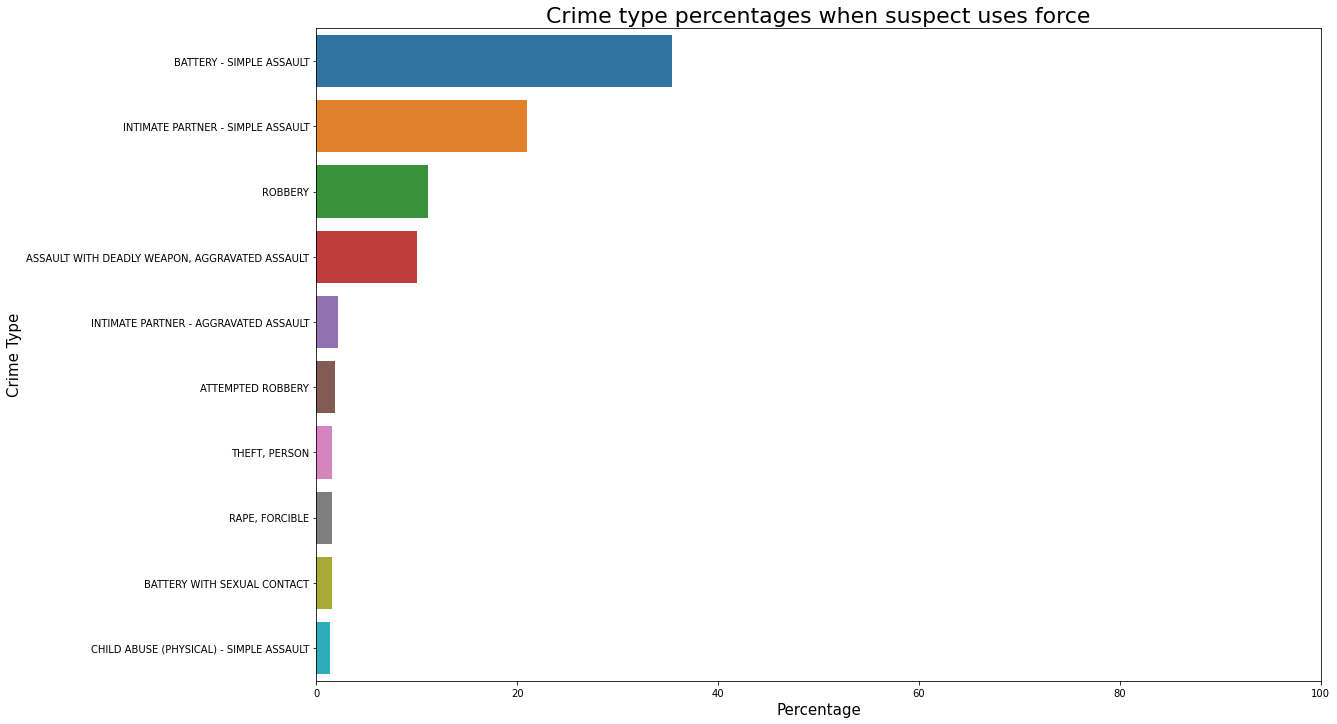

In [207]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=percentage[:10], y=counts.index[:10], )
plt.title('Crime type percentages when suspect uses force', fontdict ={'size': 22})
ax.set_xlim(0,100)
plt.ylabel('Crime Type', fontdict ={'size': 15})
plt.xlabel('Percentage',fontdict ={'size': 15})

* Now we can see the plot

Text(0.5, 0, 'Percentage')

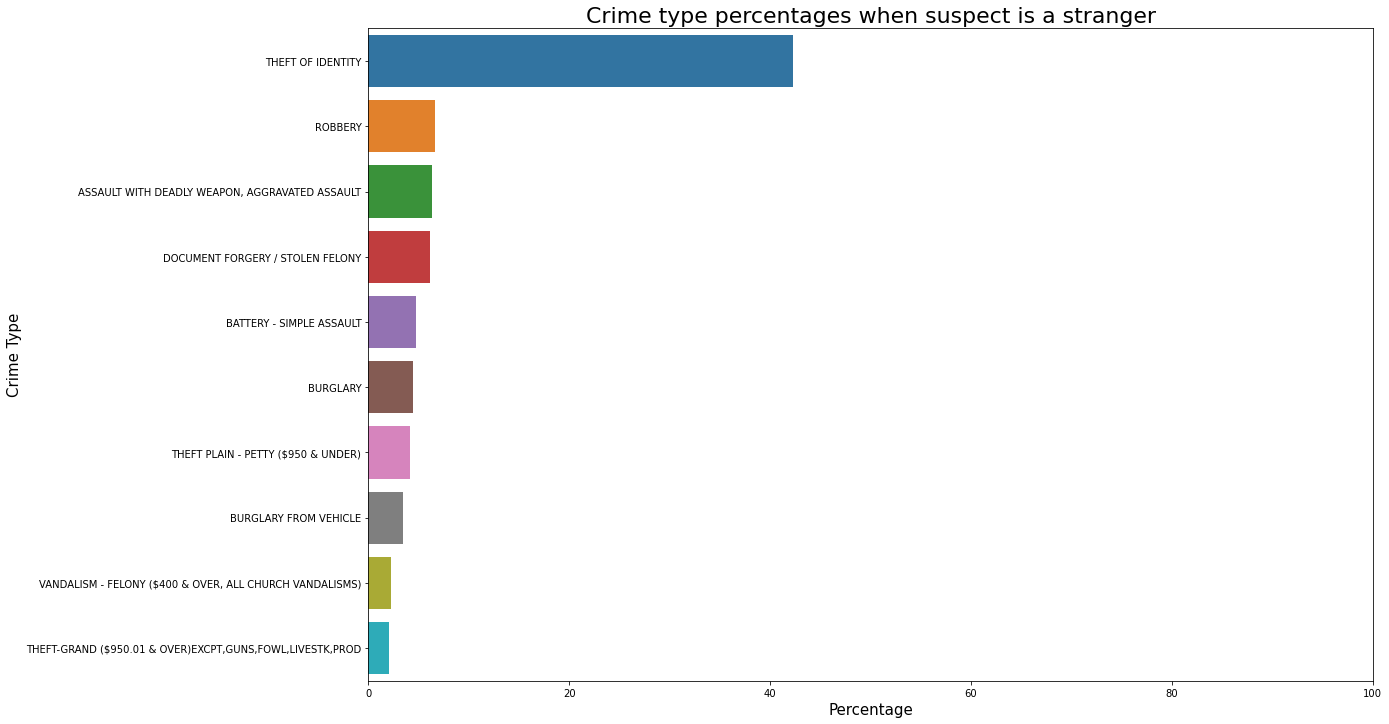

In [203]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=percentage[:10], y=counts.index[:10], )
plt.title('Crime type percentages when suspect is a stranger', fontdict ={'size': 22})
ax.set_xlim(0,100)
plt.ylabel('Crime Type', fontdict ={'size': 15})
plt.xlabel('Percentage',fontdict ={'size': 15})

### Visualisation of delay between occurance and reporting by crime type

* Now we calculate the time delay between the actual date it happened and the date it was reported to the LAPD

In [85]:
la_crimes['TIME_DIFF'] = la_crimes['DATE_RPTD'].dt.date - la_crimes['DATE_OCC'].dt.date
la_crimes['TIME_DIFF']

0         0 days
1         1 days
2         0 days
3         0 days
4         1 days
           ...  
2114694   0 days
2114695   1 days
2114696   0 days
2114697   1 days
2114698   0 days
Name: TIME_DIFF, Length: 2114699, dtype: timedelta64[ns]

* Changing the datatype of `TIME_DIFF` to float

In [96]:
la_crimes['TIME_DIFF'] = la_crimes['TIME_DIFF'].astype('timedelta64[D]')

* Getting the mean of time delay per crime type

In [111]:
crimes_delay = la_crimes[['TIME_DIFF','CRM_DESC']].groupby(by='CRM_DESC').mean()
crimes_delay = crimes_delay.reset_index()
crimes_delay = crimes_delay.sort_values(by='TIME_DIFF', ascending=False)
crimes_delay

,CRM_DESC,TIME_DIFF
80,LEWD/LASCIVIOUS ACTS WITH CHILD,434.185654
40,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,329.811556
104,SEXUAL PENETRATION W/FOREIGN OBJECT,260.701994
84,ORAL COPULATION,250.438720
130,TRAIN WRECKING,235.500000
...,...,...
81,LYNCHING,0.288889
11,BIKE - ATTEMPTED STOLEN,0.205128
127,TILL TAP - ATTEMPT,0.000000
65,FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIR...,0.000000


Text(0.5, 0, 'DELAY IN DAYS')

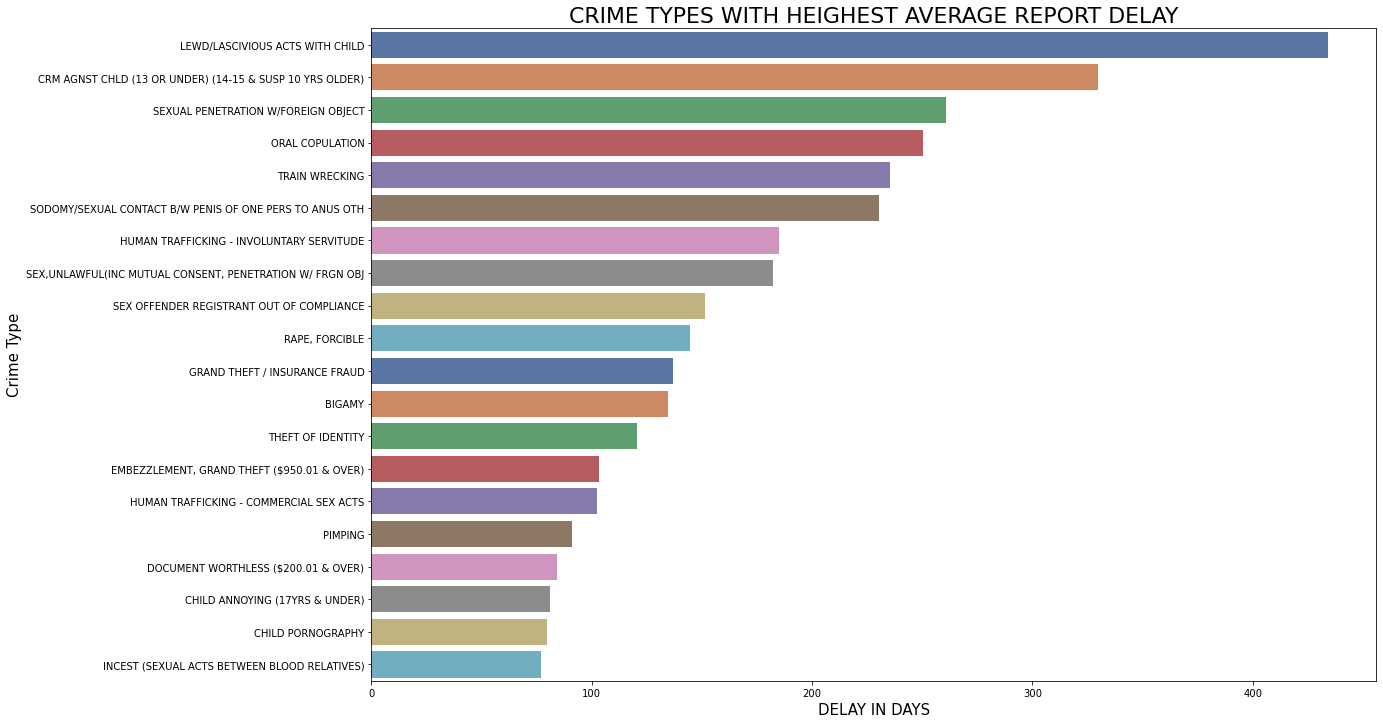

In [130]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='TIME_DIFF', y='CRM_DESC', data=crimes_delay[:20], palette='deep')
plt.title('CRIME TYPES WITH HEIGHEST AVERAGE REPORT DELAY', fontdict ={'size': 22})
#ax.set_xlim(0,100)
plt.ylabel('Crime Type', fontdict ={'size': 15})
plt.xlabel('DELAY IN DAYS',fontdict ={'size': 15})

Text(0.5, 0, 'DELAY IN DAYS')

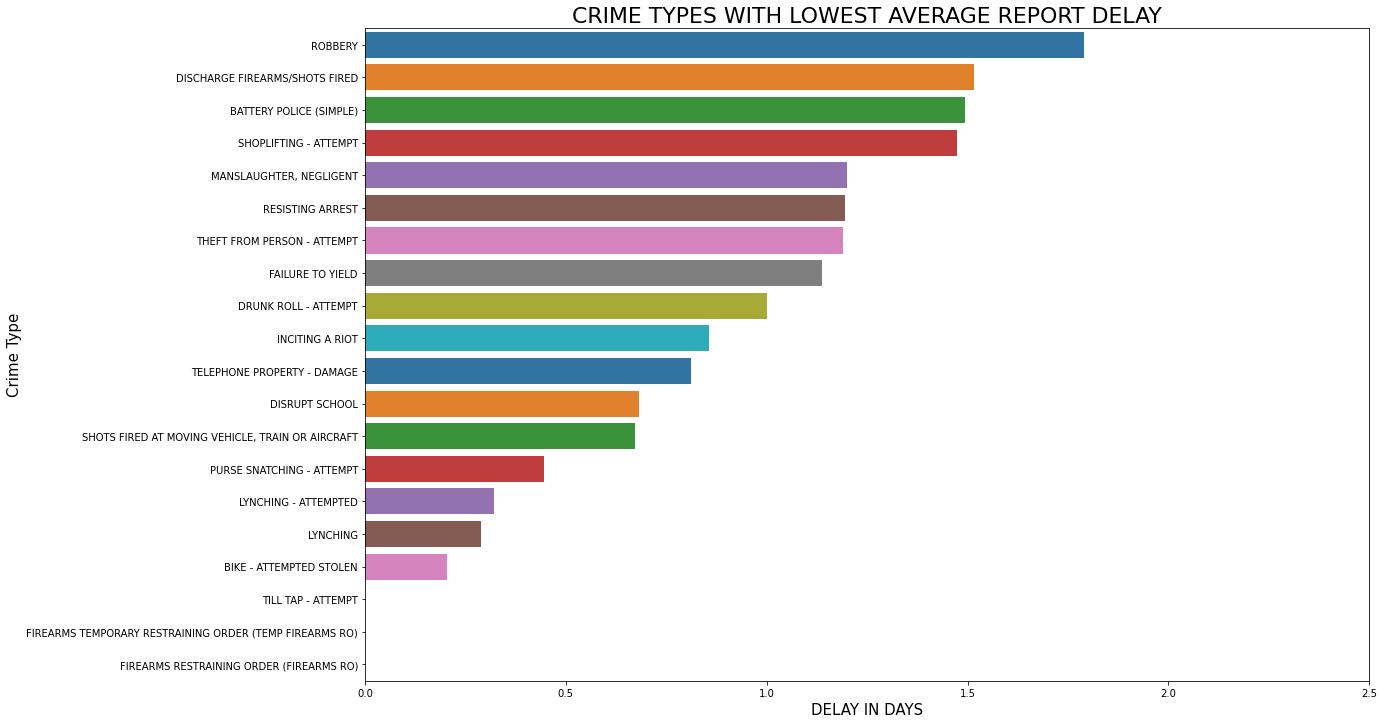

In [131]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='TIME_DIFF', y='CRM_DESC', data=crimes_delay[-20:], palette='tab10')
plt.title('CRIME TYPES WITH LOWEST AVERAGE REPORT DELAY', fontdict ={'size': 22})
ax.set_xlim(0,2.5)
plt.ylabel('Crime Type', fontdict ={'size': 15})
plt.xlabel('DELAY IN DAYS',fontdict ={'size': 15})

In [64]:
la_crimes

,DR_NO,DATE_RPTD,DATE_OCC,AREA_NAME,DISTR_NO,PART1_2,CRM_CD,CRM_DESC,MOCODES,VICT_AGE,...,VICT_DESC,PREMIS_DESC,WEAPON_DESC,STATUS,CRM_CD2,CRM_CD3,CRM_CD4,LOCATION,LAT,LON
0,1307355,2010-02-20,2010-02-20 13:50:00,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,...,H,SINGLE FAMILY DWELLING,unknown,Adult Arrest,-1,-1,-1,300 E GAGE AV,33.9825,-118.2695
1,11401303,2010-09-13,2010-09-12 00:45:00,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,...,W,STREET,unknown,Invest Cont,-1,-1,-1,SEPULVEDA BL,33.9599,-118.3962
2,70309629,2010-08-09,2010-08-09 15:15:00,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,...,H,ALLEY,unknown,Invest Cont,-1,-1,-1,1300 E 21ST ST,34.0224,-118.2524
3,90631215,2010-01-05,2010-01-05 01:50:00,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,...,W,STREET,HAND GUN,Invest Cont,998,-1,-1,CAHUENGA BL,34.1016,-118.3295
4,100100501,2010-01-03,2010-01-02 21:00:00,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,...,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114694,190608903,2019-03-28,2019-03-28 04:00:00,Hollywood,644,1,648,ARSON,0601 1501,0,...,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,FIRE,Invest Cont,-1,-1,-1,1400 N LA BREA AV,34.0962,-118.3490
2114695,190715222,2019-08-15,2019-08-14 18:10:00,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),1300 0344,40,...,W,STREET,unknown,Invest Cont,-1,-1,-1,WILLOUGHBY AV,34.0871,-118.3732
2114696,192004409,2019-01-06,2019-01-06 21:00:00,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0432 0421 0340 0305 0444 0429 0537 1218 0216,46,...,B,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,-1,-1,-1,6TH,34.0637,-118.2870
2114697,191716777,2019-10-17,2019-10-16 18:00:00,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),unknown,0,...,X,STREET,unknown,Invest Cont,-1,-1,-1,17200 NAPA ST,34.2266,-118.5085


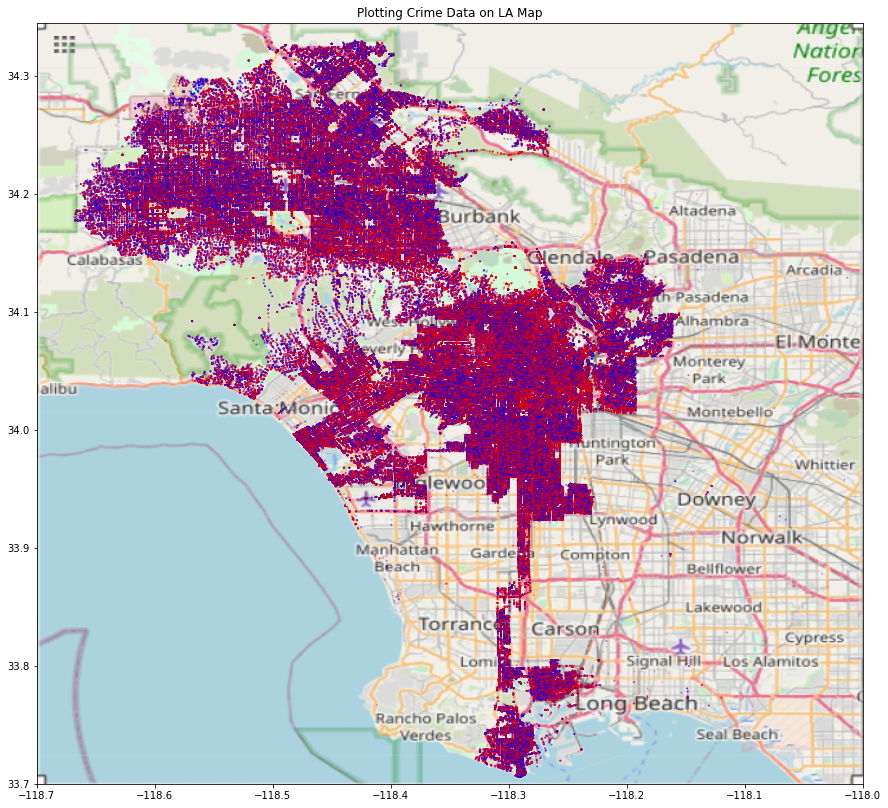

In [80]:
from matplotlib import colors # importing colors
BBox = ((-118.7000, -118, 33.7000, 34.3450)) # coordinates of map
ruh_m = plt.imread('lamap.png') #importing the map
fig,ax1 = plt.subplots(figsize = (16,14))
colormap = colors.ListedColormap(['red','blue'])#,'orange' ,'purple','c','aqua']) # create new colormap
ax1.scatter(la_crimes.LON, la_crimes.LAT, zorder=1, alpha= 0.2, cmap=colormap,
           c=la_crimes.PART1_2, s=1,)
ax1.set_title('Plotting Crime Data on LA Map')
ax1.set_xlim(BBox[0],BBox[1])
ax1.set_ylim(BBox[2],BBox[3])
ax1.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [82]:
la_crimes.loc[la_crimes.PART1_2==1]['CRM_DESC'].value_counts()

BURGLARY FROM VEHICLE                                       162160
VEHICLE - STOLEN                                            159857
THEFT PLAIN - PETTY ($950 & UNDER)                          149820
BURGLARY                                                    147641
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               92704
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              88478
ROBBERY                                                      83856
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     74530
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     48396
THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)             31638
BRANDISH WEAPON                                              15471
INTIMATE PARTNER - AGGRAVATED ASSAULT                        15393
THEFT, PERSON                                                14777
BIKE - STOLEN                                                14339
BURGLARY, ATTEMPTED                                          1

In [84]:
la_crimes.loc[la_crimes.PART1_2==2]['CRM_DESC'].value_counts()[:20]

BATTERY - SIMPLE ASSAULT                                    190543
THEFT OF IDENTITY                                           126998
INTIMATE PARTNER - SIMPLE ASSAULT                           114540
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     109440
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     90426
CRIMINAL THREATS - NO WEAPON DISPLAYED                       56639
DOCUMENT FORGERY / STOLEN FELONY                             22801
TRESPASSING                                                  21588
LETTERS, LEWD  -  TELEPHONE CALLS, LEWD                      21180
OTHER MISCELLANEOUS CRIME                                    20692
VIOLATION OF COURT ORDER                                     20038
VIOLATION OF RESTRAINING ORDER                               19324
BATTERY WITH SEXUAL CONTACT                                  11265
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                       9287
BUNCO, GRAND THEFT                                            